# Importações

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, shapiro

from constants import DIR_OUTPUT_TABLES, DIR_OUTPUT_GRAPHS, DIR_OTHERS_DATA

# Carregando arquivos csv

## Tabela relacionando Games vs. Adaptações
(output de game_adaptation.ipynb)

In [2]:
df_game_adaptation = pd.read_csv(os.path.join(DIR_OUTPUT_TABLES, 'game_adaptation.csv'),)
df_game_adaptation['ReleaseDate'] = pd.to_datetime(df_game_adaptation['ReleaseDate'], format='%Y-%m-%d', errors='coerce').dt.date
df_game_adaptation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   GameTitle                              86 non-null     object 
 1   MaxHistoricalPeak                      86 non-null     int64  
 2   AdaptReleasePeak                       86 non-null     int64  
 3   AdaptReleaseAbsoluteGrowth             86 non-null     float64
 4   AdaptReleasePercentualGrowth           86 non-null     float64
 5   PreviousYearPeak                       82 non-null     float64
 6   PreviousYearAbsoluteGrowth             81 non-null     float64
 7   PreviousYearPercentualGrowth           81 non-null     float64
 8   NextMonthPeak                          85 non-null     float64
 9   NextMonthAbsoluteGrowth                85 non-null     float64
 10  NextMonthPercentualGrowth              85 non-null     float64
 11  NextMont

## Tabela relacionando Games vs. Adaptações
(somente jogos com crescimentos estatisticamente significativos, segundo MannWhitney)

In [3]:
stat_relevant = pd.read_csv(os.path.join(DIR_OTHERS_DATA, 'estat_relevantes.csv'),)
df_game_adaptation_relevant = df_game_adaptation[df_game_adaptation['GameTitle'].isin(stat_relevant['gameTitle'])].copy()
df_game_adaptation_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 5 to 82
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   GameTitle                              25 non-null     object 
 1   MaxHistoricalPeak                      25 non-null     int64  
 2   AdaptReleasePeak                       25 non-null     int64  
 3   AdaptReleaseAbsoluteGrowth             25 non-null     float64
 4   AdaptReleasePercentualGrowth           25 non-null     float64
 5   PreviousYearPeak                       24 non-null     float64
 6   PreviousYearAbsoluteGrowth             24 non-null     float64
 7   PreviousYearPercentualGrowth           24 non-null     float64
 8   NextMonthPeak                          25 non-null     float64
 9   NextMonthAbsoluteGrowth                25 non-null     float64
 10  NextMonthPercentualGrowth              25 non-null     float64
 11  NextMonthPrev

# Análise dos dados

## Rating vs. AdaptReleasePercentualGrowth

### Scatterplot

#### Função Scatterplot para Rating vs. AdaptReleasePercentualGrowth

In [4]:
def scatterplot_rating_vs_growth(df: pd.DataFrame, graph_title: str, output_file: str):
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x='Rating',
        y='AdaptReleasePercentualGrowth',
        data=df,
        hue='Franchise',       # opcional, colore por franquia
        palette='tab10',
        s=25                   # tamanho dos pontos
    )
    plt.title(graph_title)
    plt.xlabel('Rating (nota da adaptação)')
    plt.ylabel('Crescimento Percentual de Jogadores')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.legend(title='Franquia', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    max_y = df['AdaptReleasePercentualGrowth'].max()
    plt.yticks(np.arange(0, max_y + 100, 100))  # Escala do eixo y a cada 100 unidades

    # Salvar gráfico em arquivo
    output_path = os.path.join(DIR_OUTPUT_GRAPHS, output_file)
    plt.savefig(
        output_path, 
        dpi=300, 
        bbox_inches='tight')

    plt.show()
    print(f'Gráfico salvo em: {output_path}')
    

#### Scatterplot
(considerando todos os jogos)

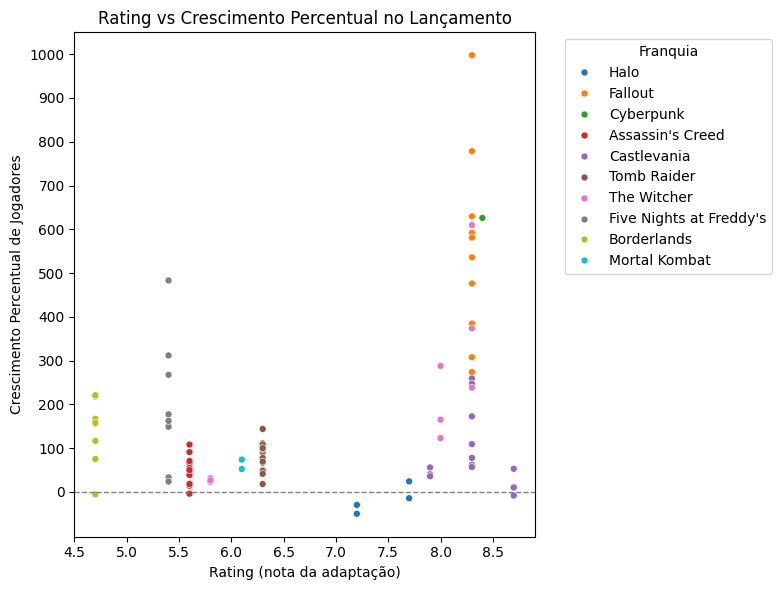

Gráfico salvo em: data/output/graphs/rating_vs_growth.png


In [26]:
graph_title = 'Rating vs Crescimento Percentual no Lançamento'
scatterplot_rating_vs_growth(df_game_adaptation, graph_title, 'rating_vs_growth.png')

#### Scatterplot
(somente jogos com crescimentos estatisticamente significativos, segundo MannWhitney)

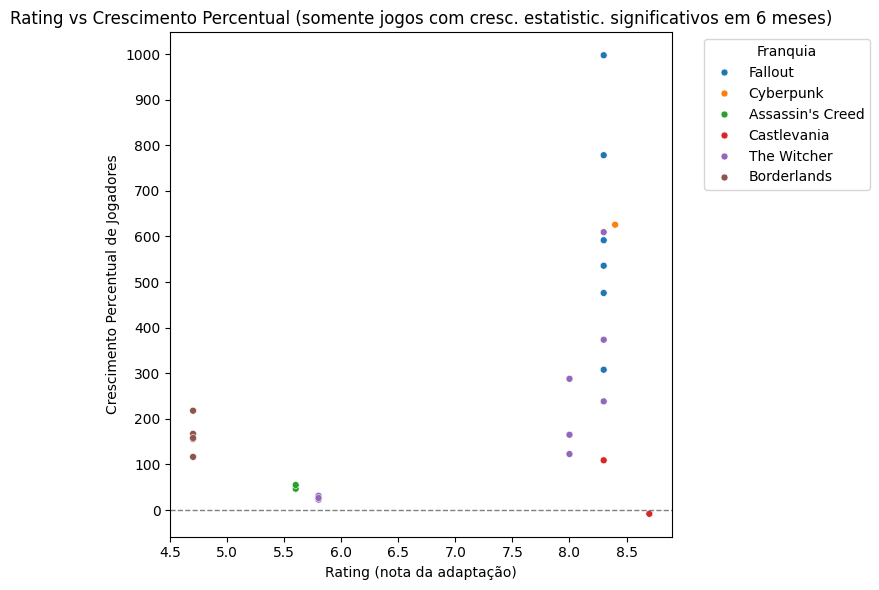

Gráfico salvo em: data/output/graphs/rating_vs_growth_jogosSignificativos.png


In [5]:
graph_title = 'Rating vs Crescimento Percentual (somente jogos com cresc. estatistic. significativos em 6 meses)'
scatterplot_rating_vs_growth(df_game_adaptation_relevant, graph_title, 'rating_vs_growth_jogosSignificativos.png')

### Correlações

#### Função calcular correlação para Rating vs. AdaptReleasePercentualGrowth

In [6]:
def correlations_rating_vs_growth(df: pd.DataFrame, output_file: str):
    with open(os.path.join(DIR_OUTPUT_GRAPHS, output_file), 'w') as output_txt_file:
        # testando normalidade de Growth
        stat, pvalue = shapiro(df_game_adaptation['AdaptReleasePercentualGrowth'])
        print(f"p_valor={pvalue:.10f}")
        print(f"p_valor={pvalue:.10f}", file=output_txt_file)
        if pvalue > 0.05:
            print("⇒ Distribuição não rejeita normalidade\n")
            print("⇒ Distribuição não rejeita normalidade\n", file=output_txt_file)
        else:
            print("⇒ Distribuição não é normal: use Spearman\n")
            print("⇒ Distribuição não é normal: use Spearman\n", file=output_txt_file)
            
        # 2. Correlações
        r_p, p_p = pearsonr(df_game_adaptation['Rating'], df_game_adaptation['AdaptReleasePercentualGrowth'])
        r_s, p_s = spearmanr(df_game_adaptation['Rating'], df_game_adaptation['AdaptReleasePercentualGrowth'])
        
        print(f'Pearson r={r_p:.2f}, p={p_p:.3f}')
        print(f'Pearson r={r_p:.2f}, p={p_p:.3f}', file=output_txt_file)
        print(f'Spearman ρ={r_s:.2f}, p={p_s:.3f}')
        print(f'Spearman ρ={r_s:.2f}, p={p_s:.3f}', file=output_txt_file)

#### Correlações
(considerando todos os jogos)

In [7]:
correlations_rating_vs_growth(df_game_adaptation, 'rating_vs_growth.txt')

p_valor=0.0000000001
⇒ Distribuição não é normal: use Spearman

Pearson r=0.39, p=0.000
Spearman ρ=0.20, p=0.069


#### Correlações
(somente jogos com crescimentos estatisticamente significativos, segundo MannWhitney)

In [8]:
correlations_rating_vs_growth(df_game_adaptation_relevant, 'rating_vs_growth_jogosSignificativos.txt')

p_valor=0.0000000001
⇒ Distribuição não é normal: use Spearman

Pearson r=0.39, p=0.000
Spearman ρ=0.20, p=0.069
